In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

%matplotlib inline
pd.options.display.max_rows = 68
pd.options.display.max_columns = 68

In [58]:
# read the sequences file
arquivo = 'hikoyu_fasta.txt'

file_content = open(arquivo, "r")
"""file_content.close() """

all_lines = file_content.readlines();

sequences = {}
sequences_info = {}
description = ''

for line in all_lines:
    
    sequence = []
    
    if ">" in line:
        description = line
        sequence = []
        sequences[description] = sequence
    else:
        sequences[description].append(line)


In [59]:
'''sequences['>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n']'''

"sequences['>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n']"

In [60]:
#count A,T,C,G,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,CT,CG,GG,GA,GT,GC for each sequence

for description in sequences:
    
    sequences_info[description] = {}
    
    sequences_info[description]['A'] = 0
    sequences_info[description]['T'] = 0
    sequences_info[description]['C'] = 0
    sequences_info[description]['G'] = 0
    
    sequences_info[description]['AA'] = 0
    sequences_info[description]['AT'] = 0
    sequences_info[description]['AC'] = 0
    sequences_info[description]['AG'] = 0
    
    sequences_info[description]['TA'] = 0
    sequences_info[description]['TT'] = 0
    sequences_info[description]['TC'] = 0
    sequences_info[description]['TG'] = 0
    
    sequences_info[description]['CA'] = 0
    sequences_info[description]['CT'] = 0
    sequences_info[description]['CC'] = 0
    sequences_info[description]['CG'] = 0
    
    sequences_info[description]['GA'] = 0
    sequences_info[description]['GT'] = 0
    sequences_info[description]['GC'] = 0
    sequences_info[description]['GG'] = 0
    
    sequences_info[description]['SIZE'] = 0
    
    #key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'

    for line in sequences[description]:
        
        sequences_info[description]['SIZE'] += len(line)
        sequences_info[description]['A'] += line.count('A')
        sequences_info[description]['T'] += line.count('T')
        sequences_info[description]['C'] += line.count('C')
        sequences_info[description]['G'] += line.count('G')
        
        sequences_info[description]['AA'] += line.count('AA')
        sequences_info[description]['AT'] += line.count('AT')
        sequences_info[description]['AC'] += line.count('AC')
        sequences_info[description]['AG'] += line.count('AG')
    
        sequences_info[description]['TA'] += line.count('AT')
        sequences_info[description]['TT'] += line.count('TT')
        sequences_info[description]['TC'] += line.count('TC')
        sequences_info[description]['TG'] += line.count('TG')
    
        sequences_info[description]['CA'] += line.count('CA')
        sequences_info[description]['CT'] += line.count('CT')
        sequences_info[description]['CC'] += line.count('CC')
        sequences_info[description]['CG'] += line.count('CG')
    
        sequences_info[description]['GA'] += line.count('GA')
        sequences_info[description]['GT'] += line.count('GT')
        sequences_info[description]['GC'] += line.count('GC')
        sequences_info[description]['GG'] += line.count('GG')   
    

In [61]:
#calc nucleotideo bias

for description in sequences:
         
    fA = sequences_info[description]['A'] / sequences_info[description]['SIZE'] 
    fT = sequences_info[description]['T'] / sequences_info[description]['SIZE']
    fC = sequences_info[description]['C'] / sequences_info[description]['SIZE']
    fG = sequences_info[description]['G'] / sequences_info[description]['SIZE'] 
        
    fAA = sequences_info[description]['AA'] / sequences_info[description]['SIZE']       
    fAT = sequences_info[description]['AT'] / sequences_info[description]['SIZE']       
    fAC = sequences_info[description]['AC'] / sequences_info[description]['SIZE']       
    fAG = sequences_info[description]['AG'] / sequences_info[description]['SIZE']    
      
    fTA = sequences_info[description]['TA'] / sequences_info[description]['SIZE']       
    fTT = sequences_info[description]['TT'] / sequences_info[description]['SIZE']       
    fTC = sequences_info[description]['TC'] / sequences_info[description]['SIZE']       
    fTG = sequences_info[description]['TG'] / sequences_info[description]['SIZE']       

    fCA = sequences_info[description]['CA'] / sequences_info[description]['SIZE']       
    fCT = sequences_info[description]['CT'] / sequences_info[description]['SIZE']       
    fCC = sequences_info[description]['CC'] / sequences_info[description]['SIZE']       
    fCG = sequences_info[description]['CG'] / sequences_info[description]['SIZE']       

    fGA = sequences_info[description]['GA'] / sequences_info[description]['SIZE']       
    fGT = sequences_info[description]['GT'] / sequences_info[description]['SIZE']       
    fGC = sequences_info[description]['GC'] / sequences_info[description]['SIZE']       
    fGG = sequences_info[description]['GG'] / sequences_info[description]['SIZE']
        
    sequences_info[description]['fA'] = fA
    sequences_info[description]['fT'] = fT
    sequences_info[description]['fC'] = fC
    sequences_info[description]['fG'] = fG
       
    sequences_info[description]['pAA'] = fAA/fA*fA
    sequences_info[description]['pAT'] = fAT/fA*fT
    sequences_info[description]['pAC'] = fAC/fA*fC
    sequences_info[description]['pAG'] = fAC/fA*fG

    sequences_info[description]['pTA'] = fTA/fT*fA
    sequences_info[description]['pTT'] = fTT/fT*fT
    sequences_info[description]['pTC'] = fTC/fT*fC
    sequences_info[description]['pTG'] = fTC/fT*fG
      
    sequences_info[description]['pCA'] = fCA/fC*fA
    sequences_info[description]['pCT'] = fCT/fC*fT
    sequences_info[description]['pCC'] = fCC/fC*fC
    sequences_info[description]['pCG'] = fCC/fC*fG

    sequences_info[description]['pGA'] = fGA/fG*fA
    sequences_info[description]['pGT'] = fGT/fG*fT
    sequences_info[description]['pGC'] = fGC/fG*fC
    sequences_info[description]['pGG'] = fGC/fG*fG


In [62]:
sequences_info['>LC521925.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/AI/I-004/2020 RNA, complete genome\n']

{'A': 8920,
 'T': 9589,
 'C': 5486,
 'G': 5853,
 'AA': 2136,
 'AT': 2273,
 'AC': 1990,
 'AG': 1707,
 'TA': 2273,
 'TT': 2412,
 'TC': 1385,
 'TG': 2538,
 'CA': 2046,
 'CT': 2035,
 'CC': 772,
 'CG': 433,
 'GA': 1587,
 'GT': 1950,
 'GC': 1156,
 'GG': 959,
 'SIZE': 30346,
 'fA': 0.2939431885586239,
 'fT': 0.31598892770052067,
 'fC': 0.18078165161800566,
 'fG': 0.19287550253740196,
 'pAA': 0.07038818954722204,
 'pAT': 0.08052049693534567,
 'pAC': 0.04033133259190934,
 'pAG': 0.043029400229756716,
 'pTA': 0.0696770119505425,
 'pTT': 0.07948329269096421,
 'pTC': 0.026111438887364464,
 'pTG': 0.02785823036962162,
 'pCA': 0.10962591392470736,
 'pCT': 0.11721426683750631,
 'pCC': 0.02543992618467014,
 'pCG': 0.02714179510734129,
 'pGA': 0.07970063902999079,
 'pGT': 0.10527565505142925,
 'pGC': 0.03570538002228166,
 'pGG': 0.038093982732485335}

In [63]:
#creating a dataframe
df_original = pd.DataFrame.from_dict(sequences_info, orient='index', columns=['fA', 'fT', 'fC', 'fG',
                                                                     'pAA','pAT', 'pAC', 'pAG',
                                                                     'pTA','pTA', 'pTC', 'pTG',
                                                                     'pCA','pCT', 'pCC', 'pCG',
                                                                     'pGA','pGT', 'pGC', 'pGG'])

In [64]:
df_original

,fA,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
">LC521925.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/AI/I-004/2020 RNA, complete genome\n",0.293943,0.315989,0.180782,0.192876,0.070388,0.080520,0.040331,0.043029,0.069677,0.069677,0.026111,0.027858,0.109626,0.117214,0.025440,0.027142,0.079701,0.105276,0.035705,0.038094
">LC522972.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/KY/V-029/2020 RNA, complete genome\n",0.294015,0.315874,0.180702,0.193014,0.070022,0.080215,0.040183,0.042921,0.069497,0.069497,0.025895,0.027660,0.109646,0.116878,0.025514,0.027252,0.080035,0.105435,0.035752,0.038188
">LC522973.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-012/2020 RNA, complete genome\n",0.294015,0.315874,0.180702,0.193014,0.070022,0.080180,0.040203,0.042942,0.069467,0.069467,0.025895,0.027660,0.109753,0.116820,0.025514,0.027252,0.080035,0.105543,0.035690,0.038122
">LC522974.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-501/2020 RNA, complete genome\n",0.294015,0.315841,0.180735,0.193014,0.070022,0.080172,0.040211,0.042942,0.069474,0.069474,0.025903,0.027663,0.109733,0.116844,0.025514,0.027247,0.080035,0.105478,0.035728,0.038155
">LC522975.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-521/2020 RNA, complete genome\n",0.294015,0.315874,0.180735,0.192981,0.070022,0.080215,0.040211,0.042935,0.069497,0.069497,0.025900,0.027655,0.109733,0.116856,0.025514,0.027242,0.080049,0.105507,0.035734,0.038155
">LC528232.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-020 RNA, complete genome\n",0.294036,0.315944,0.180685,0.192921,0.070425,0.080373,0.040406,0.043142,0.069614,0.069614,0.026035,0.027798,0.109574,0.117278,0.025525,0.027254,0.080315,0.104937,0.035675,0.038091
">LC528233.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-027 RNA, complete genome\n",0.293839,0.315812,0.180882,0.193053,0.070129,0.081065,0.040255,0.042963,0.070177,0.070177,0.026037,0.027789,0.109916,0.118020,0.025525,0.027243,0.079655,0.105737,0.035597,0.037992
">LR757995.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.294106,0.315739,0.180770,0.192986,0.070003,0.079995,0.040153,0.042867,0.069409,0.069409,0.026317,0.028096,0.109446,0.117094,0.025453,0.027173,0.080338,0.105911,0.035747,0.038163
">LR757996.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.294178,0.315682,0.180728,0.193012,0.070342,0.080219,0.040160,0.042889,0.069662,0.069662,0.026150,0.027927,0.109834,0.117978,0.025094,0.026799,0.078953,0.104814,0.035184,0.037575
">LR757997.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.192048,0.204197,0.121159,0.127318,0.045518,0.050676,0.027450,0.028845,0.044825,0.044825,0.018350,0.019282,0.071355,0.075135,0.016735,0.017585,0.051344,0.067314,0.024557,0.025805


In [65]:
df_original.describe()

,fA,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.292453,0.314068,0.179923,0.192076,0.069724,0.079866,0.040060,0.042766,0.069251,0.069251,0.026102,0.027865,0.108779,0.116579,0.025290,0.026998,0.079277,0.104841,0.035342,0.037729
std,0.012380,0.013531,0.007245,0.008001,0.003013,0.003606,0.001563,0.001729,0.003021,0.003021,0.000985,0.001095,0.004630,0.005144,0.001057,0.001164,0.003475,0.004653,0.001346,0.001494
min,0.192048,0.204197,0.121159,0.127318,0.045518,0.050676,0.027450,0.028845,0.044825,0.044825,0.018350,0.019282,0.071355,0.075135,0.016735,0.017585,0.051344,0.067314,0.024557,0.025805
25%,0.293848,0.315690,0.180698,0.192925,0.070022,0.080169,0.040167,0.042889,0.069497,0.069497,0.026153,0.027918,0.109162,0.116818,0.025393,0.027112,0.079699,0.105408,0.035415,0.037803
50%,0.294032,0.315817,0.180738,0.192982,0.070077,0.080299,0.040211,0.042938,0.069683,0.069683,0.026219,0.027992,0.109341,0.116875,0.025435,0.027146,0.079809,0.105518,0.035444,0.037842
75%,0.294149,0.315877,0.180806,0.193015,0.070276,0.080429,0.040258,0.042985,0.069748,0.069748,0.026248,0.028026,0.109622,0.117510,0.025450,0.027172,0.079913,0.105579,0.035571,0.037959
max,0.294586,0.316031,0.183966,0.198686,0.070563,0.081065,0.041319,0.044625,0.070296,0.070296,0.027902,0.030135,0.109954,0.119376,0.025578,0.027625,0.080705,0.106042,0.036793,0.039737


In [66]:
#standardization
#Useful: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
scaler = StandardScaler()
std_data = scaler.fit_transform(df_original.values)
df_std = pd.DataFrame(std_data, index=df_original.index, columns=df_original.columns)

In [67]:
df_std

,fA,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
">LC521925.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/AI/I-004/2020 RNA, complete genome\n",0.121291,0.143007,0.119374,0.100608,0.222075,0.182822,0.174853,0.153465,0.142188,0.142188,0.009376,-0.006576,0.184350,0.124380,0.142777,0.124009,0.122746,0.094099,0.272297,0.246279
">LC522972.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/KY/V-029/2020 RNA, complete genome\n",0.127135,0.134478,0.108280,0.118074,0.099760,0.097565,0.079189,0.090234,0.082247,0.082247,-0.211769,-0.189173,0.188793,0.058435,0.212970,0.219329,0.219826,0.128630,0.307218,0.309706
">LC522973.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-012/2020 RNA, complete genome\n",0.127135,0.134478,0.108280,0.118074,0.099760,0.087684,0.092234,0.102825,0.072030,0.072030,-0.211769,-0.189173,0.212102,0.047164,0.212970,0.219329,0.219826,0.151962,0.261078,0.265308
">LC522974.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-501/2020 RNA, complete genome\n",0.127135,0.132027,0.112858,0.118074,0.099760,0.085350,0.096956,0.102825,0.074444,0.074444,-0.204181,-0.186521,0.207753,0.051880,0.212970,0.215034,0.219826,0.137915,0.289019,0.287507
">LC522975.1 Severe acute respiratory syndrome coronavirus 2 2019-nCoV/Japan/TY/WK-521/2020 RNA, complete genome\n",0.127135,0.134478,0.112858,0.113929,0.099760,0.097565,0.096956,0.098558,0.082247,0.082247,-0.206943,-0.193511,0.207753,0.054265,0.212970,0.211013,0.223784,0.144192,0.293581,0.287507
">LC528232.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-020 RNA, complete genome\n",0.128874,0.139629,0.105913,0.106372,0.234489,0.141659,0.222975,0.219280,0.121048,0.121048,-0.068645,-0.061652,0.173153,0.136892,0.224326,0.221201,0.300813,0.020863,0.249453,0.244168
">LC528233.1 Severe acute respiratory syndrome coronavirus 2 SARS-CoV-2/Hu/DP/Kng/19-027 RNA, complete genome\n",0.112814,0.129833,0.133356,0.122938,0.135500,0.335043,0.125346,0.114821,0.309020,0.309020,-0.066991,-0.070541,0.247420,0.282237,0.224326,0.211537,0.109646,0.193998,0.191194,0.177625
">LR757995.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.134541,0.124415,0.117823,0.114583,0.093376,0.036090,0.060031,0.058669,0.052791,0.052791,0.219868,0.211755,0.145206,0.100790,0.155001,0.150818,0.307676,0.231632,0.303430,0.292590
">LR757996.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",0.140374,0.120156,0.111976,0.117784,0.206574,0.098649,0.064155,0.071750,0.137302,0.137302,0.048446,0.056600,0.229670,0.273973,-0.187108,-0.172244,-0.094123,-0.005777,-0.118249,-0.103739
">LR757997.1 Wuhan seafood market pneumonia virus genome assembly, chromosome: whole_genome\n",-8.170386,-8.180079,-8.170994,-8.153601,-8.093719,-8.155083,-8.129900,-8.110090,-8.144283,-8.144283,-7.930924,-7.893079,-8.142852,-8.116541,-8.155289,-8.144494,-8.098941,-8.125755,-8.072542,-8.040544


In [68]:
#create a distance matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

distance_matrix = pd.DataFrame(
   # squareform(pdist(df_original))
    squareform(pdist(df_std, metric='euclidean'))
  #  columns = df_original.index,
  #  index = df_original.index
)


In [69]:
distance_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,0.000000,0.399485,0.400043,0.391283,0.391657,0.269759,0.407174,0.477627,0.765589,36.896392,0.417409,3.936644,0.410924,0.778684,0.406290,0.394283,0.492858,0.492858,0.399136,0.426759,0.364007,0.370146,0.372271,0.620462,0.862068,0.479381,1.413287,0.387581,0.411076,0.600129,0.391399,0.396548,0.381954,0.369319,0.358155,0.936486,0.394283,0.394283,0.378252,0.378252,0.373197,0.396373,0.274379,0.376144,0.419918,0.410630,0.389013,0.484279,0.826994,0.426491,0.374561,0.471075,0.354547,0.406780,0.419763,0.366767,0.358830,0.387092,0.309061,0.486621,0.434402,0.393770,0.335763,0.467370,0.467370,0.461622,0.467370,0.661082
1,0.399485,0.000000,0.077135,0.046560,0.042986,0.360125,0.547911,0.620173,0.988260,36.777986,0.631637,4.109411,0.610022,1.006137,0.635404,0.633674,0.704391,0.704391,0.610419,0.661765,0.585448,0.605772,0.593306,0.747403,1.086983,0.792722,1.678717,0.626349,0.582995,0.906342,0.597591,0.605562,0.576499,0.593311,0.586268,0.937302,0.633674,0.633674,0.585701,0.585701,0.591384,0.185092,0.429122,0.582343,0.607652,0.648672,0.473973,0.702730,1.057014,0.678157,0.597778,0.600129,0.594478,0.588173,0.671733,0.596542,0.604021,0.608811,0.407253,0.596571,0.751759,0.691733,0.572155,0.694094,0.694094,0.688019,0.694094,0.773878
2,0.400043,0.077135,0.000000,0.040760,0.046807,0.357033,0.543250,0.621089,0.958638,36.764414,0.617304,4.130967,0.586065,0.968383,0.608647,0.606366,0.670279,0.670279,0.583521,0.635619,0.562224,0.604243,0.568907,0.727490,1.052761,0.782719,1.669295,0.599355,0.557467,0.884299,0.577077,0.580721,0.550516,0.568934,0.561946,0.911384,0.606366,0.606366,0.555877,0.555877,0.568637,0.197169,0.420460,0.555264,0.583911,0.624195,0.481530,0.679556,1.024258,0.653845,0.574215,0.604033,0.571765,0.577403,0.643896,0.571094,0.578918,0.581270,0.391727,0.583449,0.767429,0.677748,0.553310,0.669850,0.669850,0.662538,0.669850,0.731433
3,0.391283,0.046560,0.040760,0.000000,0.021601,0.348730,0.547046,0.613052,0.970969,36.775939,0.621970,4.110361,0.596340,0.982937,0.619506,0.616661,0.686826,0.686826,0.594717,0.645818,0.571579,0.593685,0.578390,0.725001,1.066423,0.784176,1.664154,0.609494,0.569442,0.892279,0.585487,0.589756,0.561038,0.578325,0.570796,0.919065,0.616661,0.616661,0.567766,0.567766,0.578486,0.175467,0.420908,0.567435,0.595524,0.633263,0.469040,0.689012,1.038117,0.661539,0.582431,0.593301,0.579297,0.581160,0.654050,0.580168,0.587334,0.592381,0.389615,0.587648,0.754155,0.677265,0.559088,0.679338,0.679338,0.672512,0.679338,0.751086
4,0.391657,0.042986,0.046807,0.021601,0.000000,0.351335,0.537374,0.618843,0.974359,36.781753,0.616191,4.120297,0.599717,0.989789,0.623088,0.620506,0.688631,0.688631,0.598735,0.649461,0.574634,0.601514,0.582160,0.736315,1.074063,0.782755,1.669962,0.613199,0.572203,0.891730,0.588838,0.594148,0.565258,0.582120,0.574486,0.933219,0.620506,0.620506,0.571998,0.571998,0.581275,0.183127,0.424954,0.570409,0.596930,0.637286,0.476043,0.692389,1.041800,0.665666,0.586585,0.599623,0.583641,0.579717,0.657392,0.584797,0.591547,0.596281,0.395659,0.596465,0.752351,0.679263,0.562193,0.682741,0.682741,0.676323,0.682741,0.757826
5,0.269759,0.360125,0.357033,0.348730,0.351335,0.000000,0.490761,0.559249,0.915155,36.935685,0.487965,3.991284,0.518571,0.910405,0.530239,0.522639,0.618305,0.618305,0.522589,0.532998,0.487309,0.506108,0.490154,0.649601,1.025188,0.656095,1.453360,0.515790,0.506115,0.753919,0.504999,0.496820,0.477250,0.487913,0.480463,0.975033,0.522639,0.522639,0.479200,0.479200,0.497336,0.358162,0.411530,0.488172,0.536654,0.531939,0.454558,0.602240,0.979141,0.554661,0.486648,0.539526,0.491874,0.558497,0.544820,0.487074,0.494499,0.500937,0.100270,0.576286,0.630510,0.496635,0.467223,0.589253,0.589253,0.588984,0.589253,0.775181
6,0.407174,0.547911,0.543250,0.547046,0.537374,0.490761,0.000000,0.714825,0.854187,37.014649,0.244835,4.110983,0.56

In [70]:
#create an adjacency matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

adj_matrix_0_018 = distance_matrix.copy()
adj_matrix_0_036 = distance_matrix.copy()
adj_matrix_0_055 = distance_matrix.copy()
adj_matrix_0_01  = distance_matrix.copy()
adj_matrix_2_0   = distance_matrix.copy()

In [71]:
#applying the thresholds
adj_matrix_0_018 = adj_matrix_0_018.applymap(lambda x: 1 if x <= 0.018 else 0)
adj_matrix_0_036 = adj_matrix_0_036.applymap(lambda x: 1 if x <= 0.036 else 0)
adj_matrix_0_055 = adj_matrix_0_055.applymap(lambda x: 1 if x <= 0.055 else 0)
adj_matrix_0_01 = adj_matrix_0_01.applymap(lambda x: 1 if x <= 0.01 else 0)
adj_matrix_2_0 = adj_matrix_2_0.applymap(lambda x: 1 if x <= 2.0 else 0)

In [72]:
adj_matrix_0_018

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


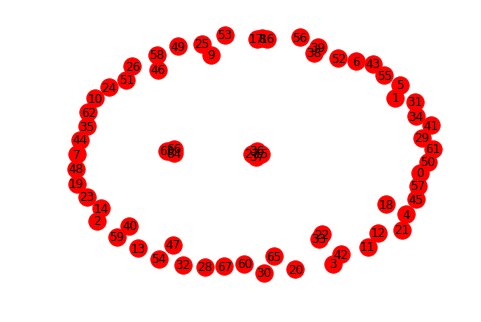

In [76]:
#creating graphs
#https://ipython-books.github.io/142-drawing-flight-routes-with-networkx/
#https://networkx.github.io/documentation/networkx-1.10/tutorial/tutorial.html

G=nx.from_pandas_adjacency(adj_matrix_0_018, create_using=nx.DiGraph())

#G = nx.from_numpy_matrix(adj_matrix_0_018.values, parallel_edges=True, 
                         #create_using=nx.MultiDiGraph())
G.edges(data=True)
nx.draw(G, with_labels=True)
plt.show()